# Sales Analysis

### Import necessary libraries

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

### Step 1: Data Collection
>* Load all sales data
>* Merge data into one csv
>* Reload all merged data

#### Load all sales data

In [6]:
file_path = './Sales_Data/'

all_months_data = pd.DataFrame()

for file in os.listdir(file_path):
    single_month_data = pd.read_csv(file_path + file)
    all_months_data = pd.concat([all_months_data, single_month_data])
    
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Merge data into one csv

In [7]:
all_months_data.to_csv("all_months_data.csv", index=False)

#### Reload all merged data

In [8]:
all_months_data = pd.read_csv('all_months_data.csv')
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Step 2: Data Processing
>* Cleaning
>* Filtering
>* Add & Delete
>* Corrections

#### Drop NaN rows from dataset

In [9]:
# find NaN rows
nan_rows = all_months_data[all_months_data.isna().any(axis=1)]
display(nan_rows.head())

# delete all nan rows
all_months_data = all_months_data.dropna(how='all')
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Filter actual data rows

In [10]:
# get rid of text in 'Order Date' column
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2] != 'Or']

#### Make columns correct data type

In [11]:
all_months_data['Quantity Ordered'] = all_months_data['Quantity Ordered'].astype('int32')
all_months_data['Price Each'] = all_months_data['Price Each'].astype('float64')

#### Add month column

In [12]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]
all_months_data['Month'] = all_months_data['Month'].astype('int32')
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add city column

In [13]:
# get city name
def get_city(address):
    return address.split(',')[1].strip(' ')

# get state name
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


### Step 3: Data Exploration
>* Find insights
>* Visualization

### Task 1: What was the best month for sales? How much was earned that month?

In [15]:
# del all_months_data['Total Price (USD)']

# add total price column for find the best month for sales
total_price = all_months_data['Quantity Ordered'].astype(float) * all_months_data['Price Each'].astype(float)
all_months_data.insert(4, 'Total Price (USD)', total_price)

In [16]:
# best month for sale
monthly_sales_data = all_months_data.groupby(by=['Month']).sum()
best_sales_month = monthly_sales_data.sort_values(by='Total Price (USD)', ascending=False)
best_sales_month.head(1)

,Quantity Ordered,Price Each,Total Price (USD)
Month,,,
12,28114,4588415.41,4613443.34


#### Let's see months sales data by bar chart

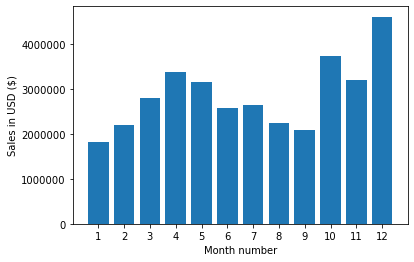

In [17]:
months = range(1,13)

plt.bar(months, all_months_data.groupby(['Month']).sum()['Total Price (USD)'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.ticklabel_format(style='plain')
plt.show()

### Task 2: What city sold the most product?

In [18]:
all_months_data.head()

most_product_sold_city = all_months_data.groupby(by=['City']).sum()
most_product_sold_city.sort_values(by=['Total Price (USD)'], ascending=False)

,Quantity Ordered,Price Each,Total Price (USD),Month
City,,,,
San Francisco CA,50239,8211461.74,8262203.91,315520
Los Angeles CA,33289,5421435.23,5452570.80,208325
New York City NY,27932,4635370.83,4664317.43,175741
Boston MA,22528,3637409.77,3661642.01,141112
Atlanta GA,16602,2779908.20,2795498.58,104794
Dallas TX,16730,2752627.82,2767975.40,104620
Seattle WA,16553,2733296.01,2747755.48,104941
Portland OR,11303,1860558.22,1870732.34,70621
Austin TX,11153,1809873.61,1819581.75,69829


#### Let's see in bar chart

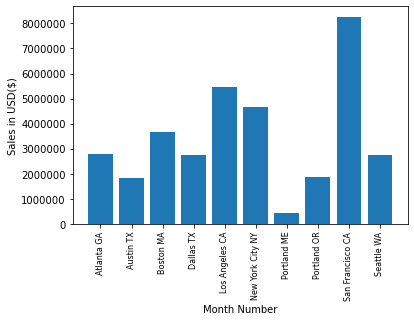

In [19]:
cities = list(most_product_sold_city.index)

plt.bar(cities, most_product_sold_city['Total Price (USD)'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD($)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Task 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [20]:
# add hour, minute & count columns
all_months_data['Hour'] = pd.to_datetime(all_months_data['Order Date']).dt.hour
all_months_data['Minute'] = pd.to_datetime(all_months_data['Order Date']).dt.minute
all_months_data['Count'] = 1
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Price (USD),Order Date,Purchase Address,Month,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA,22,30,1
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,9,27,1


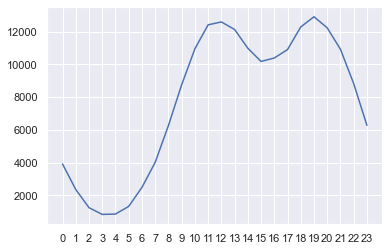

In [51]:
hours_list = [hour for hour, df, in all_months_data.groupby(['Hour'])]

plt.plot(hours_list, all_months_data.groupby(['Hour']).count()['Count'])
plt.xticks(hours_list)
plt.grid(True)
plt.show()

# My recommendation for advertisement time is between 7am to 11am 

### Task 4: What products are most often sold together?

In [151]:
df = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [81]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    count.update(Counter(combinations(row.split(','), 2)))
    
for key, value, in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Task 5: What product sold the most? Why do you think it sold the most?

In [125]:
product_group = all_months_data.groupby('Product')
product_quantity = product_group.sum()['Quantity Ordered']
product_quantity.sort_values(ascending=False).head(1)

Product
AAA Batteries (4-pack)    31017
Name: Quantity Ordered, dtype: int32

#### Lets see in bar char, what product sold the most?

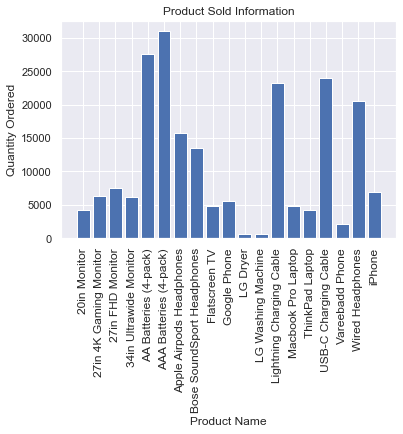

In [126]:
product_name = list(product_group.groups.keys())

plt.bar(product_name, product_quantity)
plt.xticks(product_name, rotation='vertical', size=12)
plt.title('Product Sold Information')
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.show()

,Product,Price Each
122404,AAA Batteries (4-pack),2.99


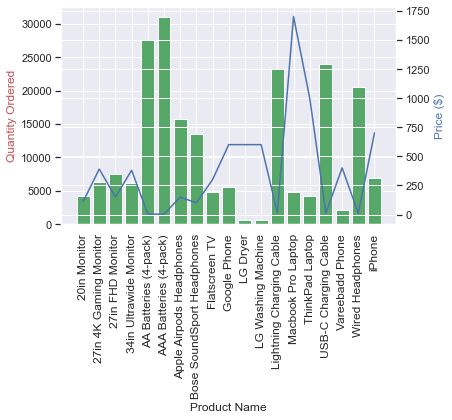

In [150]:
df = all_months_data.sort_values(by=['Price Each'])[['Product', 'Price Each']]
display(df.head(1))

prices = all_months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(product_name, product_quantity, color='g')
ax2.plot(product_name, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product_name, rotation='vertical', size=12)

plt.show()